### Libraries

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from wordcloud import WordCloud

# KM2 : Illustrative synthetic dataset, determination of k, description of clusters
Cluster the balls data using kmeans

Try to choose k based on data visualization

Try to choose the number of clusters based on finding the elbow of the loss function dependent on k

Output the cluster centers

Assess how many samples are contained in each cluster.


#### Loading the dataset

In [3]:
balls_dataset = pd.read_csv('dataBalls.csv')
balls_dataset.head()

,x,y
0,-0.202969,-1.520712
1,-0.545900,-2.165577
2,0.347952,-2.267513
3,-0.039389,-2.429920
4,-0.130040,-2.202356


#### Scatterplot of dataset

Text(0, 0.5, 'y')

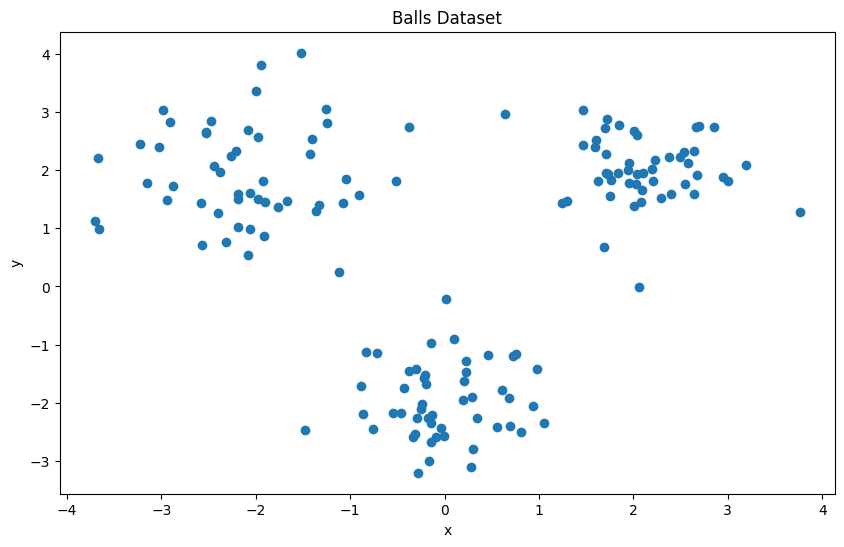

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(balls_dataset['x'], balls_dataset['y'])
plt.title('Balls Dataset')
plt.xlabel('x')
plt.ylabel('y')

We can see that the dataset consist of "3 balls", and it should be easy to cluster them

#### Try to choose the number of clusters based on finding the elbow of the loss function dependent on k

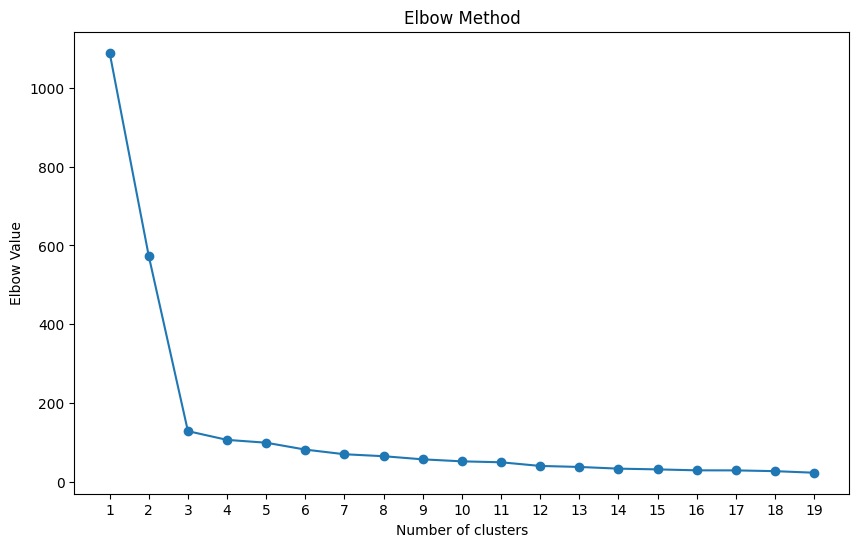

In [5]:
def plot_elbow_method(dataset):
    elbow_values = []
    for i in range(1, 20):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(dataset[['x', 'y']])
        elbow_values.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 20), elbow_values, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.xticks(range(1, 20))
    plt.ylabel('Elbow Value')
    plt.show()

plot_elbow_method(balls_dataset)

From elbow method we can see, thatthe best value of k would be 3

**k=3**

#### Cluster centers and cluster amount

In [6]:
class KMeanClassificator:
    def __init__(self, dataset, n_clusters):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.kmeans = KMeans(n_clusters=n_clusters)

    def fit(self):
        self.kmeans.fit(self.dataset[['x', 'y']])
        self.dataset['cluster'] = self.kmeans.labels_

    def get_centroids(self):
        return self.kmeans.cluster_centers_

    def calculate_cluster_amount(self):
        return self.dataset['cluster'].value_counts()

    def plot(self, title):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='x', y='y', hue='cluster', data=self.dataset)
        plt.scatter(self.get_centroids()[:, 0], self.get_centroids()[:, 1], s=25, c='red', label='Centroids')
        plt.title(f'{title} Dataset')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()



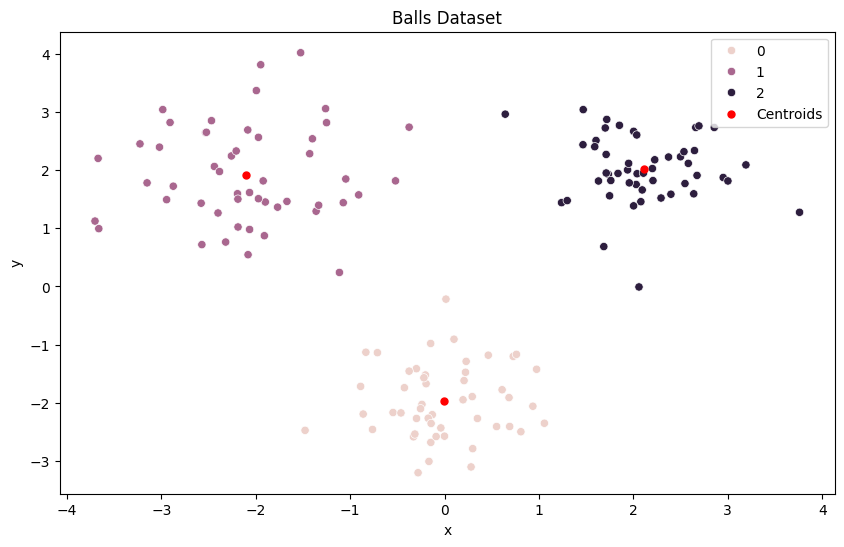

cluster
0    50
2    50
1    50
Name: count, dtype: int64


In [7]:
balls_KMean = KMeanClassificator(balls_dataset, 3)
balls_KMean.fit()
balls_KMean.plot("Balls")
print(balls_KMean.calculate_cluster_amount())

# KM3 : Illustrative synthetic datasets, determination of k, description of clusters

(a) Cluster the two Moons data using kmeans. Choose k both with the generic elbow method and by visualization. Output the cluster centers. Is the result good?

(b) Cluster the circles data using kmeans. Choose k both with the generic elbow method and by visualization. Output the cluster centers. Is the result good?

#### a) Two Moons dataset

In [8]:
# loading dataset
two_moons_dataset = pd.read_csv('twoMoons.csv')
two_moons_dataset.head()

,x,y
0,-5.1226,0.7478
1,-4.6440,1.9530
2,5.8056,-2.0327
3,-3.7811,2.5167
4,4.4117,-2.6287


#### Scatterplot 

Text(0, 0.5, 'y')

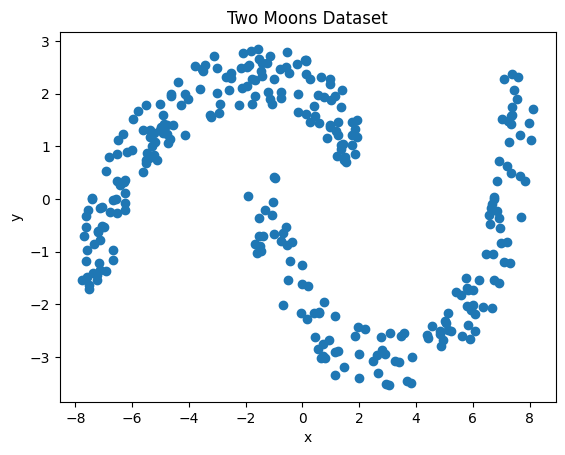

In [9]:
plt.scatter(two_moons_dataset['x'], two_moons_dataset['y'])
plt.title('Two Moons Dataset')
plt.xlabel('x')
plt.ylabel('y')


I would say we can see 2 clusters, and we should split it that way

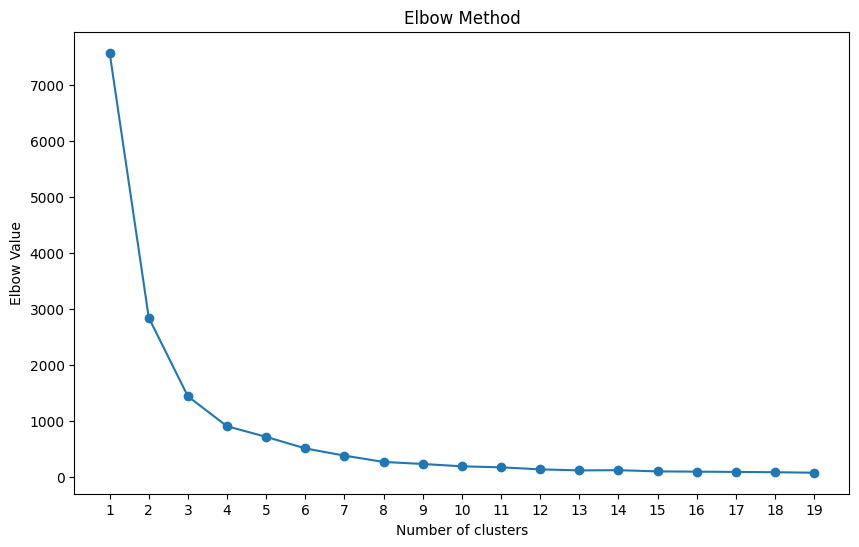

In [10]:
plot_elbow_method(two_moons_dataset)

From elbow method we can see the elbow on k=3, maybe k=4

#### Clsutering with k=3

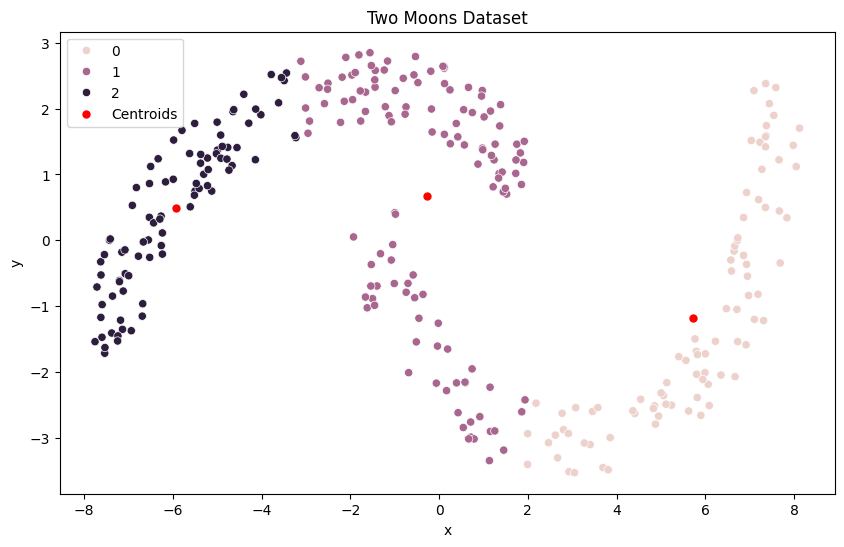

In [11]:
two_moons_KMean_3 = KMeanClassificator(two_moons_dataset, 3)
two_moons_KMean_3.fit()
two_moons_KMean_3.plot("Two Moons")

#### Clustering with k=4

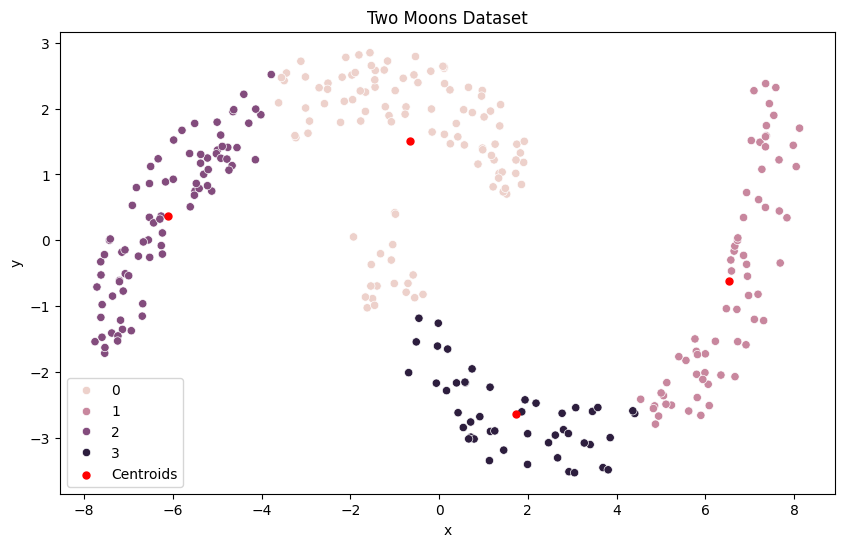

In [12]:
two_moons_KMean_4 = KMeanClassificator(two_moons_dataset, 4)
two_moons_KMean_4.fit()
two_moons_KMean_4.plot("Two Moons")

#### Clustering with k=2

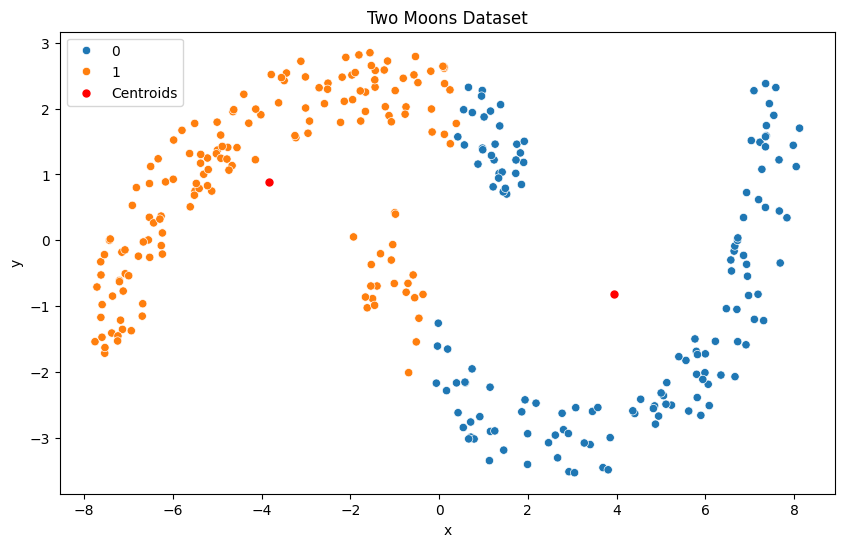

In [13]:
two_moons_KMean_2 = KMeanClassificator(two_moons_dataset, 2)
two_moons_KMean_2.fit()
two_moons_KMean_2.plot("Two Moons")

#### Combining the plots on one big plot

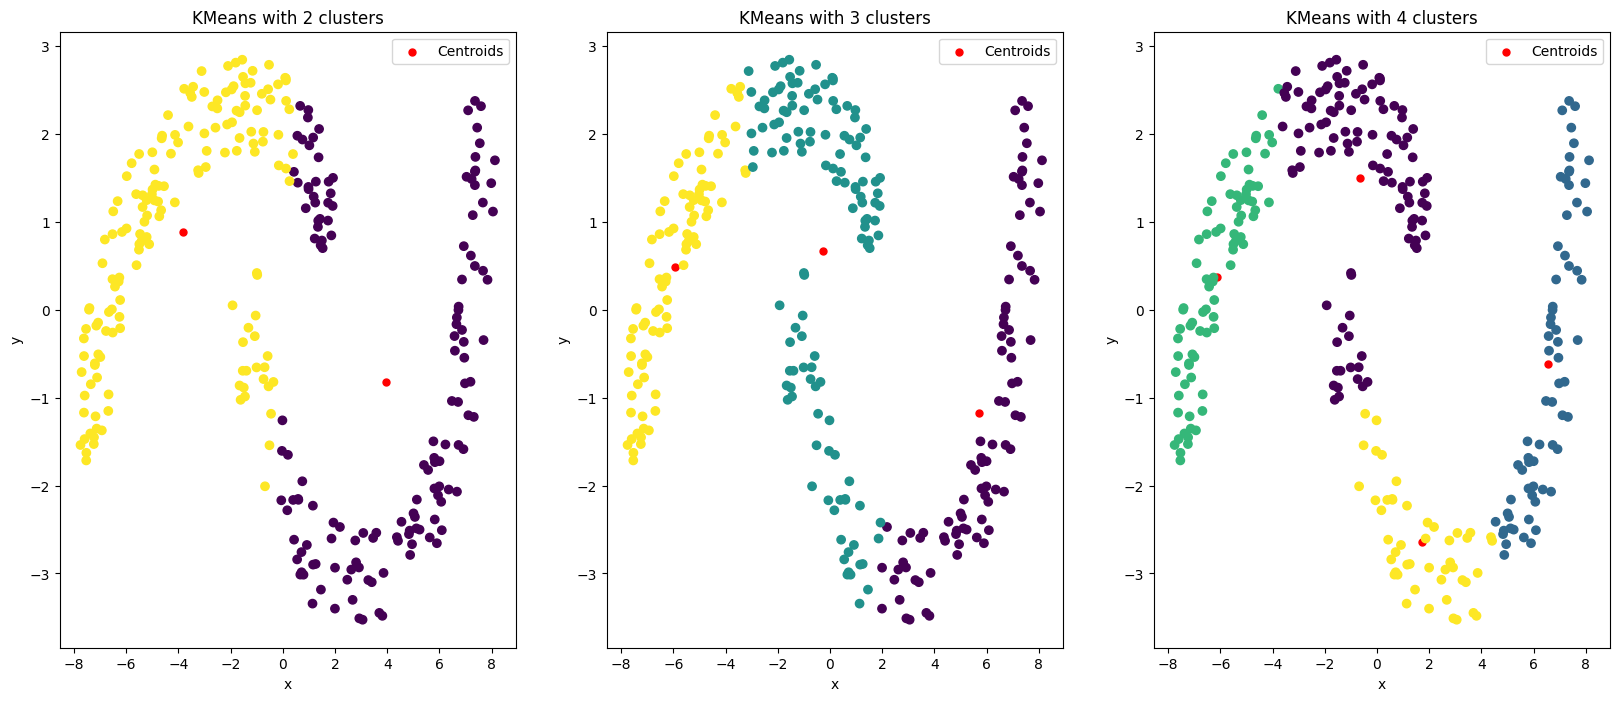

In [14]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.scatter(two_moons_KMean_2.get_centroids()[:, 0], two_moons_KMean_2.get_centroids()[:, 1], s=25, c='red', label='Centroids')
plt.scatter(two_moons_dataset['x'], two_moons_dataset['y'], c=two_moons_KMean_2.kmeans.labels_)
plt.title('KMeans with 2 clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(two_moons_KMean_3.get_centroids()[:, 0], two_moons_KMean_3.get_centroids()[:, 1], s=25, c='red', label='Centroids')
plt.scatter(two_moons_dataset['x'], two_moons_dataset['y'], c=two_moons_KMean_3.kmeans.labels_)
plt.title('KMeans with 3 clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(two_moons_KMean_4.get_centroids()[:, 0], two_moons_KMean_4.get_centroids()[:, 1], s=25, c='red', label='Centroids')
plt.scatter(two_moons_dataset['x'], two_moons_dataset['y'], c=two_moons_KMean_4.kmeans.labels_)
plt.title('KMeans with 4 clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

### b) Circles Dataset

In [15]:
# loading dataset
circles_dataset = pd.read_csv('dataCircles.csv')
circles_dataset.head()

,x,y
0,-0.180736,0.729611
1,0.154802,-1.072998
2,0.191250,-0.979264
3,0.036093,-0.790743
4,1.058191,-0.030355


#### Scatterplot

Text(0, 0.5, 'y')

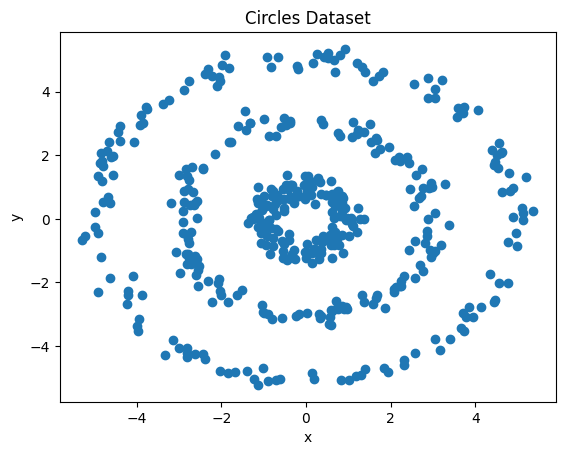

In [16]:
plt.scatter(circles_dataset['x'], circles_dataset['y'])
plt.title('Circles Dataset')
plt.xlabel('x')
plt.ylabel('y')

#### Elbow method

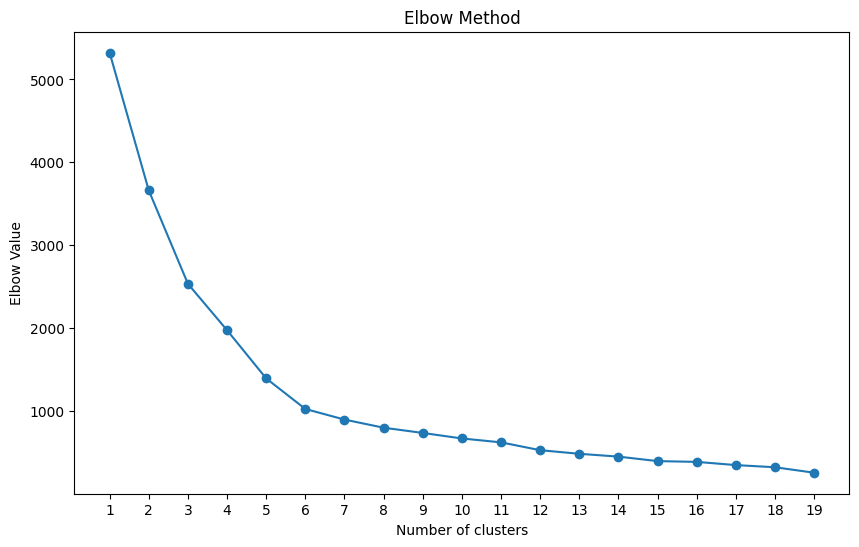

In [17]:
plot_elbow_method(circles_dataset)

#### Clustering with k=3

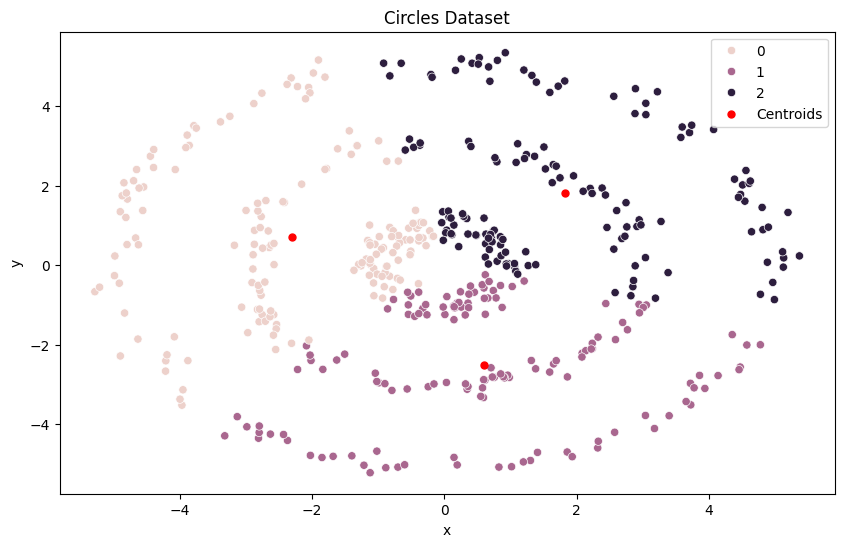

In [18]:
circles_KMean_3 = KMeanClassificator(circles_dataset, 3)
circles_KMean_3.fit()
circles_KMean_3.plot("Circles")

#### Clustering with k=4

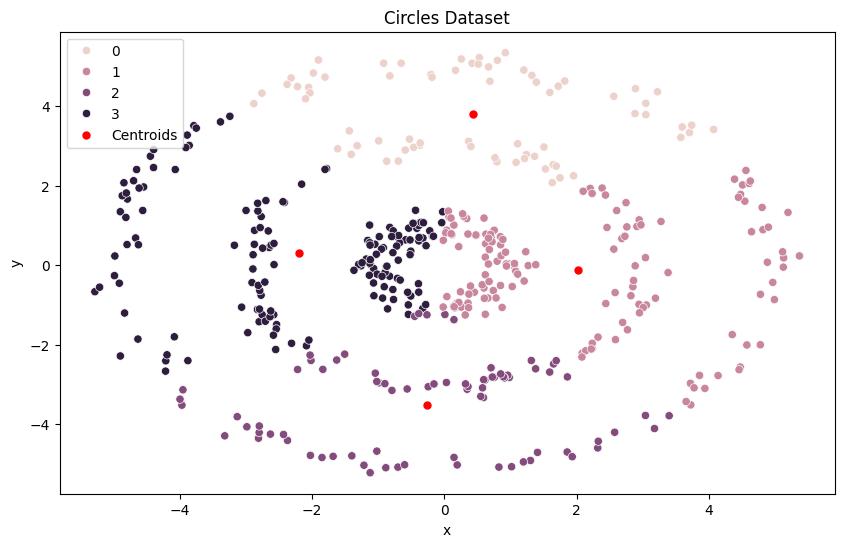

In [19]:
circles_KMean_4 = KMeanClassificator(circles_dataset, 4)
circles_KMean_4.fit()
circles_KMean_4.plot("Circles")

#### Summary
- For both datasets, the results are not good
- Results for Two Moons dataset with k=2 looks almost correct, but aren't accurate in 100%
- Results for Circles dataset are completely wrong. Instead of clustering "rings", the algorithm clustered "slices"
- KMean is really good for "ball" structures

# KM4 : Movies dataset
(a) Cluster the movies data using kmeans. Try to find a good k

(b) For sake of simplicity here we set k = 5. Output the cluster centers and use it to interpret the meaning and sizes of the found clusters

(c) (*) Analyze the meaning of the 5 clusters by visualizing each cluster using a WordCloud.

In [69]:
# loading the dataset
movie_dataset = pd.read_csv('movieData.csv')
movie_dataset.head()

,Row,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,"""#7DaysLater"" (2013)",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,"""#BlackLove"" (2015) {Miss Independent (#1.5)}",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,"""#BlackLove"" (2015) {Sealing the Deal (#1.10)}",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### Trying elbow method

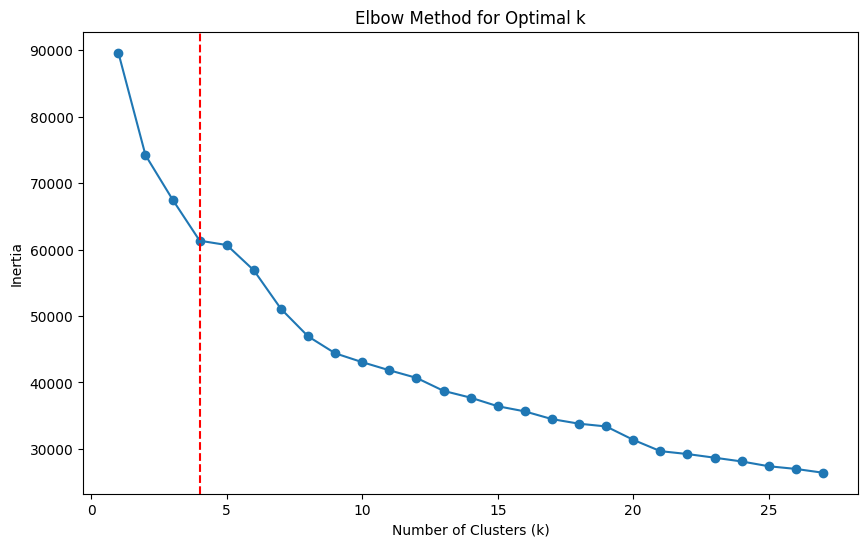

In [70]:
movie_features = movie_dataset.iloc[:, 1:].values


k_range = range(1, 28)
inertia = []


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(movie_features)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# in my opinion the k value 4 would be a good fit
plt.axvline(x=4, color='red', linestyle='--')
plt.show()

### Output the cluster centers and use it to interpret the meaning and sizes of the found clusters (k=5)

In [ ]:
SELECTED_K = 5

# train the model only on values from belonging to the genres
kmeans = KMeans(n_clusters=SELECTED_K, random_state=42)
kmeans.fit(movie_features)

# get the cluster centers -> how each genre contibutes to this cluster
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=movie_dataset.columns[1:])


movie_dataset['Cluster'] = kmeans.labels_
cluster_sizes = movie_dataset['Cluster'].value_counts().sort_index()
print("\nCluster Sizes:\n", cluster_sizes)


Cluster Sizes:
 Cluster
0      739
1     5791
2     5451
3    13724
4    24294
Name: count, dtype: int64


In [72]:
cluster_centers.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,0.102842,-4.065758e-19,0.033829,0.096076,0.051421,0.250338,-5.273559e-16,0.174560,0.129905,0.033829,...,7.442490e-02,0.116373,0.085250,0.004060,0.001353,1.000000e+00,3.247632e-02,0.004060,0.002706,1.040834e-17
1,0.273701,-1.165517e-18,0.049042,0.016923,0.003799,0.116906,8.791228e-01,0.011397,0.957693,0.008634,...,1.036090e-03,0.000863,0.086168,0.086859,0.001209,1.006140e-16,2.081668e-17,0.420307,0.005871,3.108271e-03
2,0.423042,7.338103e-04,0.473858,0.688498,0.000367,0.459182,4.494588e-02,0.000917,0.153183,0.655476,...,5.342948e-16,0.001468,0.103467,0.429646,0.012842,1.394240e-02,-5.551115e-16,0.091359,0.000917,5.870482e-03
3,0.071189,2.185952e-04,0.044958,0.012387,0.015593,0.199140,3.278927e-03,0.008525,1.000000,0.080953,...,7.286505e-05,0.021860,0.447610,0.034028,0.000947,1.457301e-04,1.165841e-03,0.028490,0.024045,8.379481e-03
4,0.011155,1.234873e-04,0.032806,0.043756,0.021363,0.289495,5.038281e-02,0.248868,0.000576,0.077632,...,8.438298e-02,0.204207,0.039022,0.016506,0.007203,-1.797174e-15,9.245081e-02,0.010496,0.011772,3.202437e-02


### Interpretation of `cluster_centers` DataFrame

#### Rows (Clusters)
- Each row corresponds to one of the `SELECTED_K` clusters (e.g., if `SELECTED_K = 5`, you’ll have 5 rows).

#### Columns (Genres)
- Each column represents a genre from your dataset (the genre columns from `movie_dataset`).

#### Values (Genre Likelihoods)
- Each value in the DataFrame is the average genre presence for that genre in a particular cluster.
- Since the values in your dataset are binary (0 or 1), the values in `cluster_centers` will range between 0 and 1:
  - A value closer to **1** indicates that movies in that cluster are **likely to belong** to that genre.
  - A value closer to **0** indicates that movies in that cluster are **less likely to belong** to that genre.

### Example Interpretation

Suppose the `cluster_centers` DataFrame looks like this for `k=3`:

|       | Action | Comedy | Drama | Sci-Fi | Romance | Horror | ... |
|-------|--------|--------|-------|--------|---------|--------|-----|
| **0** | 0.8    | 0.1    | 0.2   | 0.7    | 0.1     | 0.05   | ... |
| **1** | 0.3    | 0.6    | 0.8   | 0.2    | 0.7     | 0.1    | ... |
| **2** | 0.2    | 0.2    | 0.1   | 0.1    | 0.05    | 0.85   | ... |

- **Cluster 0**: This cluster has high values for **Action** (0.8) and **Sci-Fi** (0.7), indicating movies in this cluster are likely to be **Action and Sci-Fi** films.
- **Cluster 1**: This cluster has high values for **Drama** (0.8), **Romance** (0.7), and **Comedy** (0.6), suggesting it represents **Drama, Romance, and Comedy** films.
- **Cluster 2**: This cluster has a high value for **Horror** (0.85), indicating it primarily contains **Horror** films.

### Insights You Can Derive

1. **Genre Profiles**: By examining the highest values in each row, you can determine the primary genres associated with each cluster.
2. **Cluster Characteristics**: Each row represents a different combination of genres that movies in that cluster tend to belong to, helping to categorize movies into broad genre groups.
3. **Strength of Genre Association**: Values closer to 1 indicate a stronger association with that genre within the cluster, while values closer to 0 indicate a weaker association.

This output provides an average genre profile for each cluster, allowing you to label or describe each cluster based on the genres that dominate it.


### Plotting bar plots of how many movies we have in each cluster

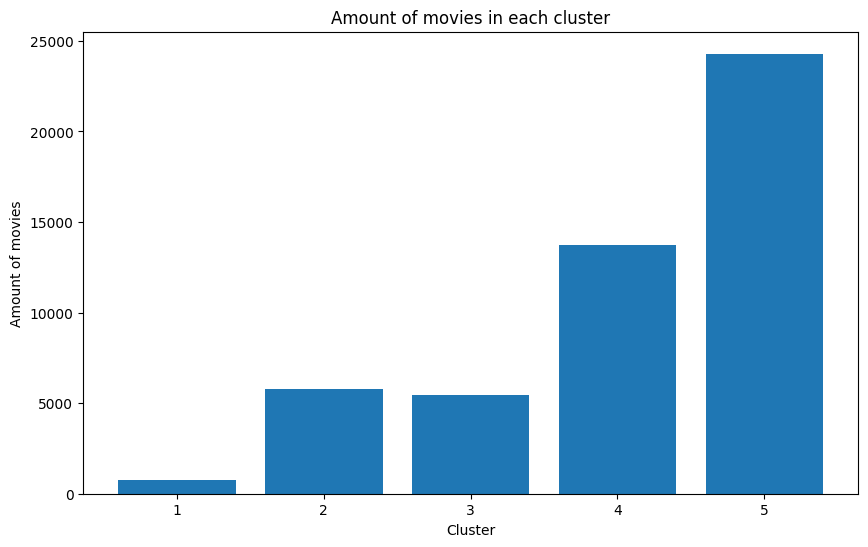

In [73]:
cluster_movies_amount = []
for i in range(SELECTED_K):
    cluster_movies_amount.append(np.sum(kmeans.labels_ == i))

# plotting bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, SELECTED_K + 1), cluster_movies_amount)
plt.title('Amount of movies in each cluster')
plt.xlabel('Cluster')
plt.ylabel('Amount of movies')
plt.show()



# Heatmap of clusters


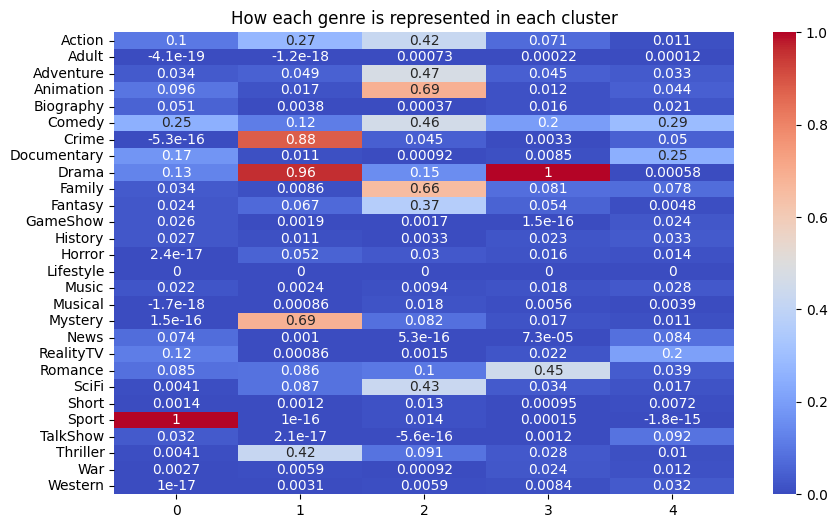

In [74]:
# creating a heatmap of the cluster centers
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers.T, annot=True, cmap='coolwarm')
plt.title('How each genre is represented in each cluster')
plt.show()


### Visualize Each Cluster with a WordCloud

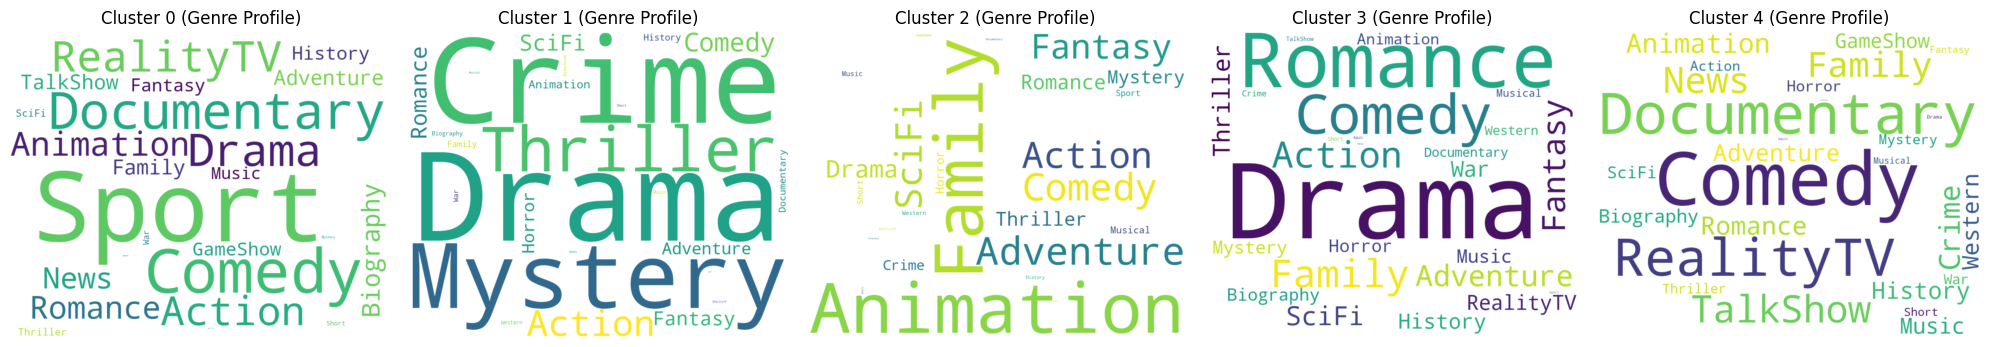

In [83]:
CLUSTER_AMOUNT = 5

fig, axes = plt.subplots(1, CLUSTER_AMOUNT, figsize=(20, 20))

for i in range(CLUSTER_AMOUNT):
    genre_frequencies = cluster_centers.iloc[i].to_dict()  # convert the row to a dictionary with genre frequencies
    wordcloud = WordCloud(width=1000, height=800, background_color='white').generate_from_frequencies(genre_frequencies)


    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'Cluster {i} (Genre Profile)')

plt.tight_layout()
plt.show()